# Excercise_Exploratory data analysis (EDA)

 Download Haberman Cancer Survival dataset from Kaggle.
 (https://www.kaggle.com/gilsousa/habermans-survival-data-set)




Explorartory data alanlaysis:
1. High level statistics of the dataset: number of  points, numer of features, number of classes, imbalance data set.
2. use visualization charts to explore different features.
3. Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) 
4. Perform Bi-variate analysis (scatter plots, pair-plots) 
5. study the correlations in the dataset


> ** You can add any other analysis**.




# import

In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as ss

# read data



In [372]:
haberman = pd.read_csv("haberman.csv", 
    names= ["Age", "Op_Year", "axil_nodes", "survival_status"])

haberman["survival_status"] = haberman["survival_status"].replace([1, 2], ["survived", "died"])

# 1. Data Description

In [373]:
## How many data-points and no. of features?
print(f"The number of data-points is: {haberman.shape[0]}, Number of features is: {haberman.shape[1]}")
# column names in the dataset?
print(haberman.columns)
# no. of  data points for each class
print ("balanced dataset ?")
no_of_observations = [len(haberman[rows]) for rows in haberman.columns] #data_points_per_column obs stands for observations
balanced = [no_of_observations[i] == no_of_observations[i+1] for i in range(len(no_of_observations)-1)]
print(balanced.count(True) == len(balanced))
# print first five rows  iris.head(10)-->print first ten rows
haberman.head(5)

The number of data-points is: 306, Number of features is: 4
Index(['Age', 'Op_Year', 'axil_nodes', 'survival_status'], dtype='object')
balanced dataset ?
True


,Age,Op_Year,axil_nodes,survival_status
0,30,64,1,survived
1,30,62,3,survived
2,30,65,0,survived
3,31,59,2,survived
4,31,65,4,survived


# 2. Visualization

## 2.1 2D Scatter Plot

Text(0.5, 1.0, 'Relationship between \nthe age & axil_nodes')

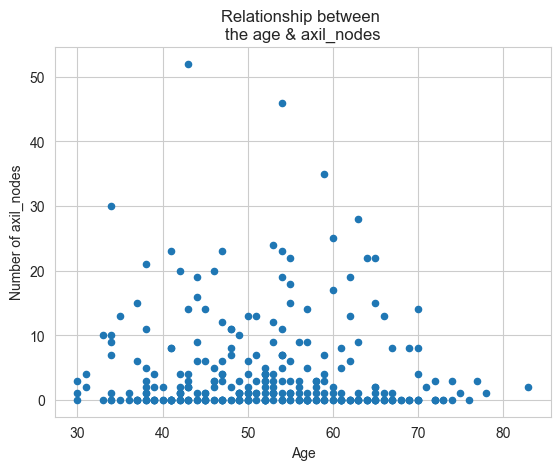

In [374]:
haberman.plot(kind="scatter", x="Age", y="axil_nodes")
plt.xlabel("Age")
plt.ylabel("Number of axil_nodes")
plt.title("Relationship between \nthe age & axil_nodes")

## 2.2 2D Scatter Plot (Colored)

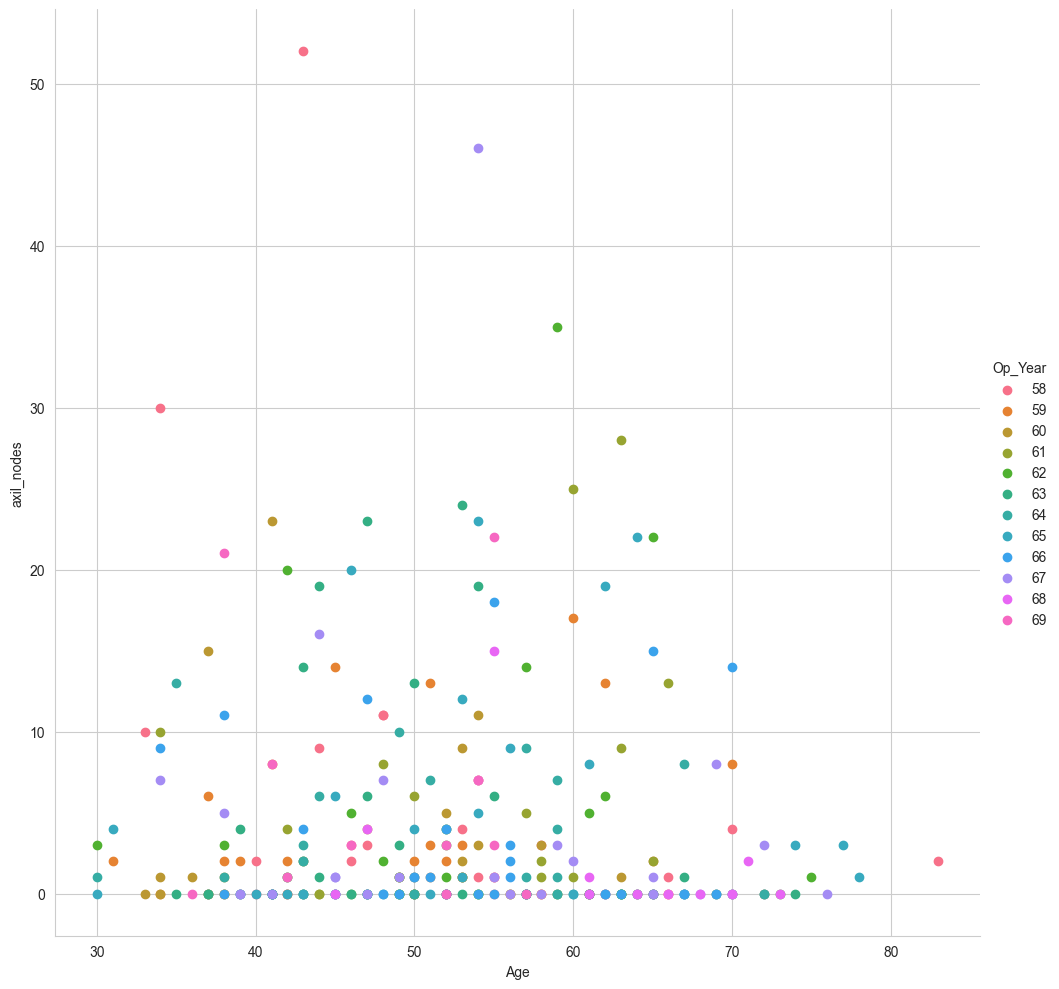

In [375]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue="Op_Year", height=10) \
    .map(plt.scatter, "Age", "axil_nodes") \
    .add_legend()

## 2.3 2D Scatter Plot (Dark)

In [376]:
fig = px.scatter(data_frame=haberman, x="Age", y="axil_nodes", color="survival_status", template="plotly_dark")
fig.update_layout(
    width=800, 
    height=600, 
    xaxis=dict(
        title="Age", 
        color="#FFD700"
    ),
    yaxis=dict(
        title="axil_nodes", 
        color="#FFD700"
    ),
    legend_traceorder="reversed"
)

## 2.4 3D Scatter Plot

In [377]:
ax = px.scatter_3d(haberman, x="Age", y="axil_nodes", z="Op_Year", color="survival_status", color_discrete_sequence=["green", "red"])
ax.update_layout(width=800, height=600)

## 2.4 Pair-plot

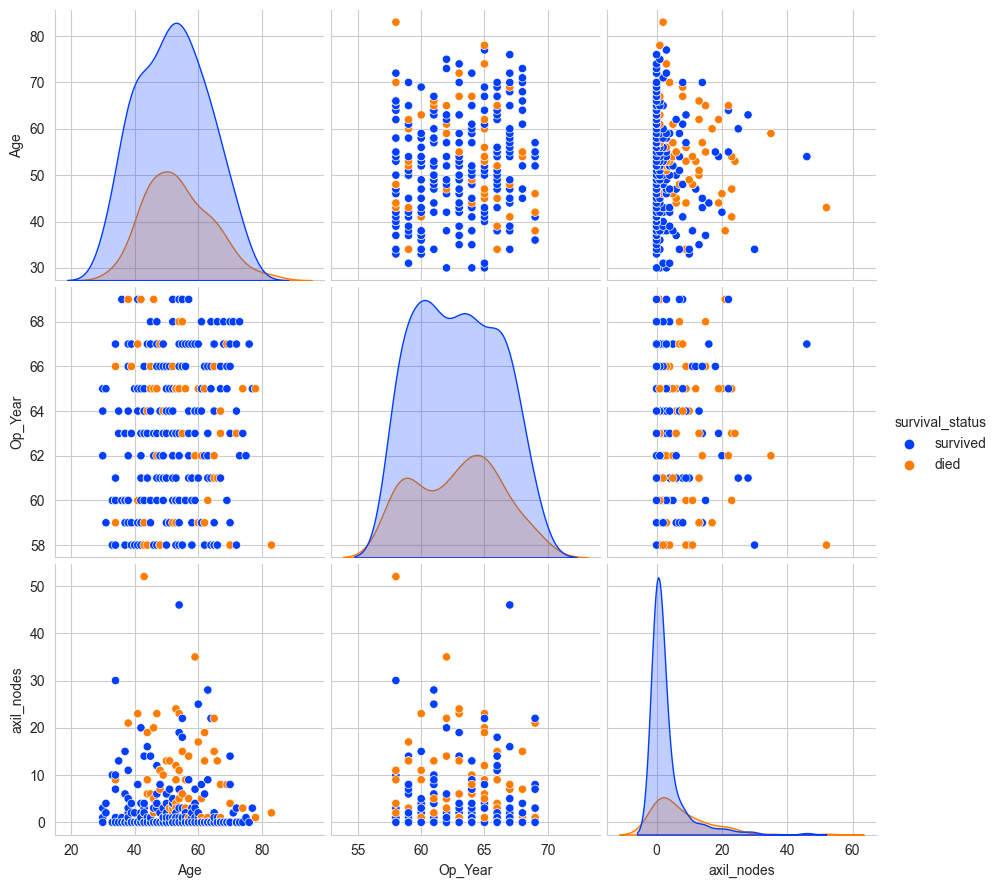

In [378]:
#[["Age", "Op_Year", "axil_nodes", "Surv_status"]]
sns.pairplot(haberman, hue="survival_status", height=3, palette="bright")

# 3. Histogram, PDF, CDF

## 3.1 Histogram

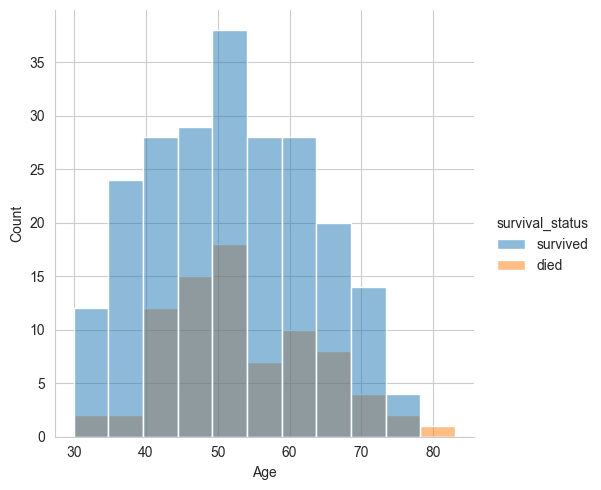

In [379]:
sns.displot(
    data=haberman, 
    kind="hist", 
    kde=False, 
    x="Age", 
    hue="survival_status"#, 
    #palette="bright"
)

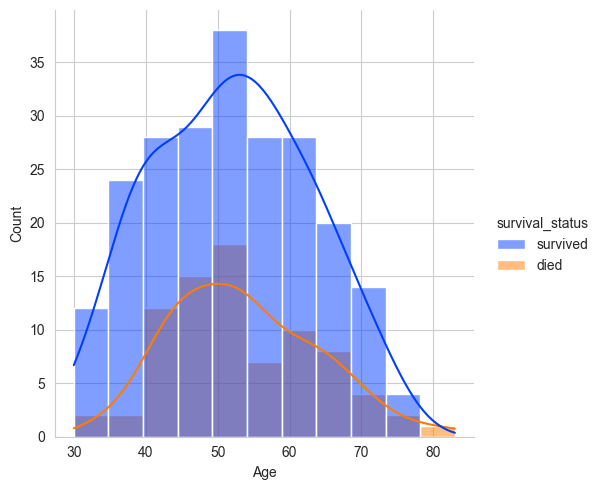

In [356]:
sns.displot(
    data=haberman, 
    kind="hist", 
    kde=True, 
    x="Age", 
    hue="survival_status", 
    palette="bright"
)

## 3.2 PDF & CDF

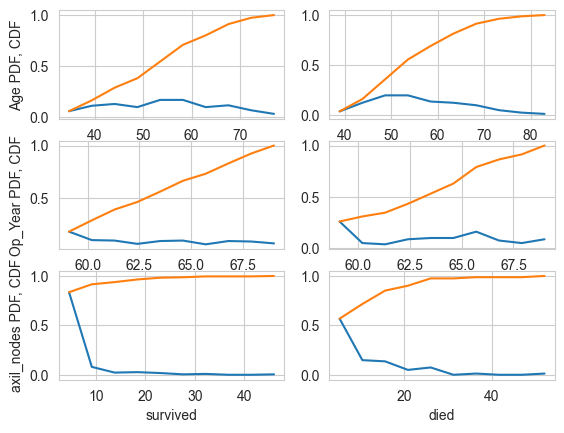

In [380]:
survived = haberman.loc[haberman["survival_status"] == "survived"]
died = haberman.loc[haberman["survival_status"] == "died"]
fig, ax =plt.subplots(3, 2)


for i in range(len(haberman.columns)):
    col = haberman.columns[i]
    label = ["pdf of survived", "cdf of survived", "pdf of died", "cdf of died"]
    if col != "survival_status":
        counts, bin_edges = np.histogram(survived[col], bins=10, density = True)
        pdf = counts/(sum(counts))
        cdf = np.cumsum(pdf)
        ax[i, 0].set_ylabel(f"{col} PDF, CDF")
        ax[i, 0].set_xlabel("survived")
        ax[i, 0].plot(bin_edges[1:], pdf)
        ax[i, 0].plot(bin_edges[1:], cdf)

        counts, bin_edges = np.histogram(died[col], bins=10, density = True)
        pdf = counts/(sum(counts))
        cdf = np.cumsum(pdf)
        ax[i, 1].set_xlabel("died")
        ax[i, 1].plot(bin_edges[1:], pdf)
        ax[i, 1].plot(bin_edges[1:], cdf)

# 4. Mean, Variance and Std-dev

In [381]:
for col in haberman.columns:
    if col != "survival_status":
        print(col,"----")
        print(f"\tMean= {haberman[col].mean()},\n\tVariance= {haberman[col].var()}, \n\tStd-dev= {haberman[col].std()} ")

Age ----
	Mean= 52.45751633986928,
	Variance= 116.71458266366656, 
	Std-dev= 10.80345234930328 
Op_Year ----
	Mean= 62.85294117647059,
	Variance= 10.558630665380907, 
	Std-dev= 3.2494046632238507 
axil_nodes ----
	Mean= 4.026143790849673,
	Variance= 51.691117539912135, 
	Std-dev= 7.189653506248555 


# 5. Median, Percentile, Quantile, IQR, MAD

In [382]:
for col in haberman.columns:
    if col != "survival_status":
        q1 = np.quantile(haberman[col], 0.25)
        q2 = haberman[col].median()
        q3 = np.quantile(haberman[col], 0.75)
        iqr = q3 - q1
        #mad =  haberman[col].mad() Will be removed
        mad = (haberman[col] - haberman[col].mean()).abs().mean()
        data_quantile = np.percentile(haberman[col], np.arange(25, 101, 25))
        data_percentile = np.percentile(haberman[col], 90)
        print(col,"--->")
        print(f"\tQ1= {q1},\n\tQ2, median= {q2}, \n\tQ3= {q3}, \n\tIQR= {iqr}, \n\tMAD= {mad}, \n\tQuantile= {data_quantile}, \n\t90Percentile= {data_percentile}")

Age --->
	Q1= 44.0,
	Q2, median= 52.0, 
	Q3= 60.75, 
	IQR= 16.75, 
	MAD= 8.865180058951685, 
	Quantile= [44.   52.   60.75 83.  ], 
	90Percentile= 67.0
Op_Year --->
	Q1= 60.0,
	Q2, median= 63.0, 
	Q3= 65.75, 
	IQR= 5.75, 
	MAD= 2.7870049980776628, 
	Quantile= [60.   63.   65.75 69.  ], 
	90Percentile= 67.0
axil_nodes --->
	Q1= 0.0,
	Q2, median= 1.0, 
	Q3= 4.0, 
	IQR= 4.0, 
	MAD= 4.790935110427613, 
	Quantile= [ 0.  1.  4. 52.], 
	90Percentile= 13.0


# 6. Box plot and Whiskers

<AxesSubplot: xlabel='survival_status', ylabel='Age'>

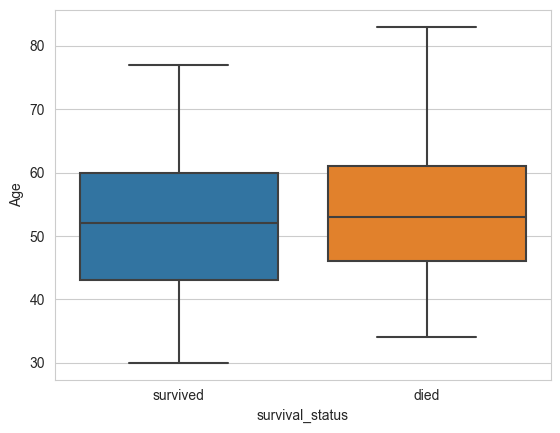

In [383]:
sns.boxplot(x= "survival_status", y="Age", data= haberman)

<AxesSubplot: xlabel='survival_status', ylabel='axil_nodes'>

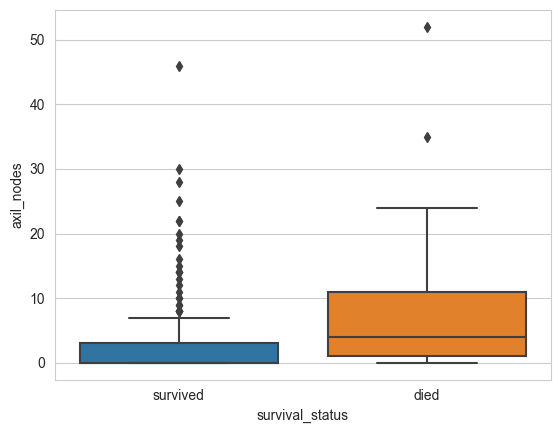

In [384]:
sns.boxplot(x= "survival_status", y="axil_nodes", data= haberman)

<AxesSubplot: xlabel='survival_status', ylabel='Op_Year'>

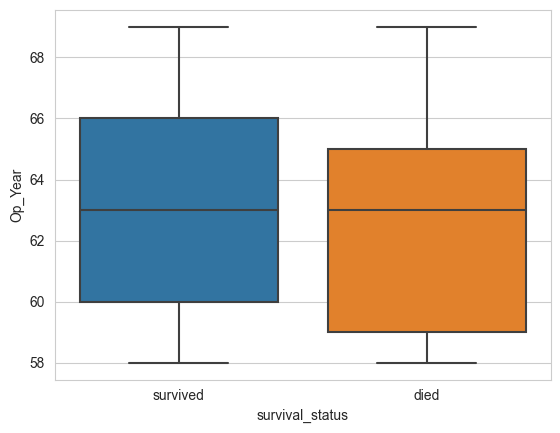

In [385]:
sns.boxplot(x= "survival_status", y="Op_Year", data= haberman)

# 7. Violin plots

<AxesSubplot: xlabel='survival_status', ylabel='Age'>

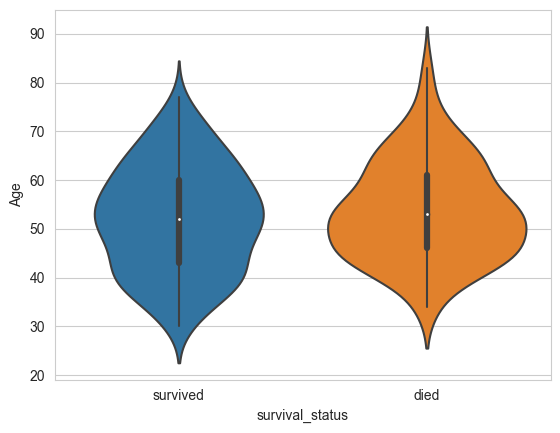

In [386]:
sns.violinplot(
    data=haberman,  
    x="survival_status", 
    y="Age"
)

<AxesSubplot: xlabel='survival_status', ylabel='axil_nodes'>

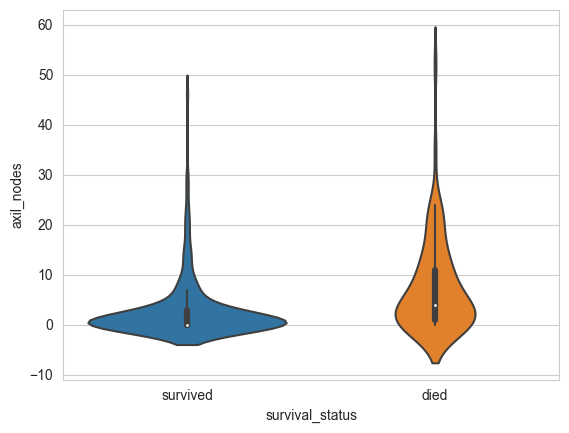

In [387]:
sns.violinplot(
    data=haberman,  
    x="survival_status", 
    y="axil_nodes"
)

<AxesSubplot: xlabel='survival_status', ylabel='Op_Year'>

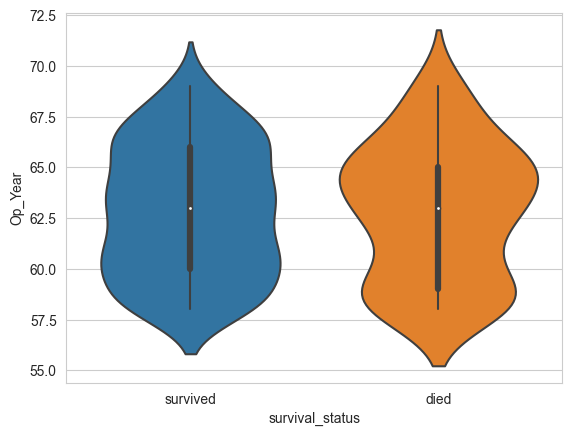

In [388]:
sns.violinplot(
    data=haberman,  
    x="survival_status", 
    y="Op_Year"
)

# 8. Multivariate probability density, contour plot.

In [389]:
for i in range(len(haberman.columns)):
    if haberman.columns[i] != "survival_status":
        survived = haberman[haberman["survival_status"] == "survived"].iloc[:, i]
        died = haberman[haberman["survival_status"] == "died"].iloc[:, i]
        print(f"{haberman.columns[i]} tests:-")
        print(f"\tcontinuous distributions between survival status: {ss.ks_2samp(survived, died)}")
        x = ss.norm.rvs(loc=0.2, size=10)
        print(f"\tKolmogorov-Smirnov test: {ss.kstest(x, 'norm')}")

Age tests:-
	continuous distributions between survival status: KstestResult(statistic=0.12444444444444444, pvalue=0.2873828132764731)
	Kolmogorov-Smirnov test: KstestResult(statistic=0.18166554898813153, pvalue=0.8396206218174966)
Op_Year tests:-
	continuous distributions between survival status: KstestResult(statistic=0.0725925925925926, pvalue=0.8858953861624655)
	Kolmogorov-Smirnov test: KstestResult(statistic=0.2954401331323774, pvalue=0.28664849123784675)
axil_nodes tests:-
	continuous distributions between survival status: KstestResult(statistic=0.33827160493827163, pvalue=1.4620232260147868e-06)
	Kolmogorov-Smirnov test: KstestResult(statistic=0.6980227447543264, pvalue=2.108095660327898e-05)


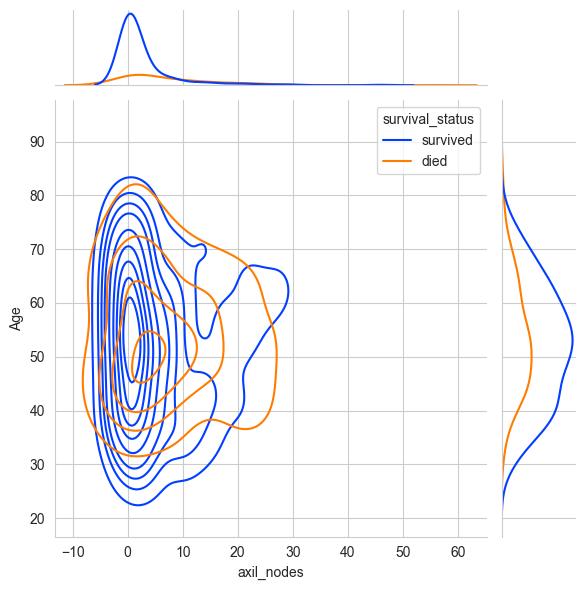

In [390]:
sns.jointplot(x="axil_nodes", y="Age", hue="survival_status", data=haberman, kind="kde", palette="bright")

C:\Users\khale\AppData\Local\Temp\ipykernel_2364\543443964.py:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<AxesSubplot: xlabel='Age', ylabel='axil_nodes'>

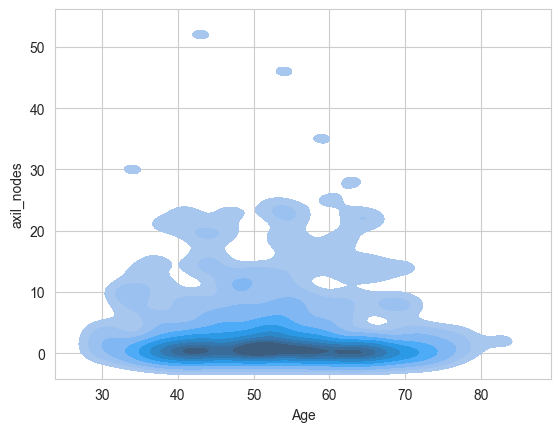

In [391]:
sns.kdeplot(x=haberman["Age"], y=haberman["axil_nodes"], shade=True, bw_adjust=0.5)

# 9. correlation



In [392]:
corelated_haberman = haberman
corelated_haberman["survival_status"] = corelated_haberman["survival_status"].replace(["survived", "died"], [1, 2])
corelated_haberman.head(5)

,Age,Op_Year,axil_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


<AxesSubplot: >

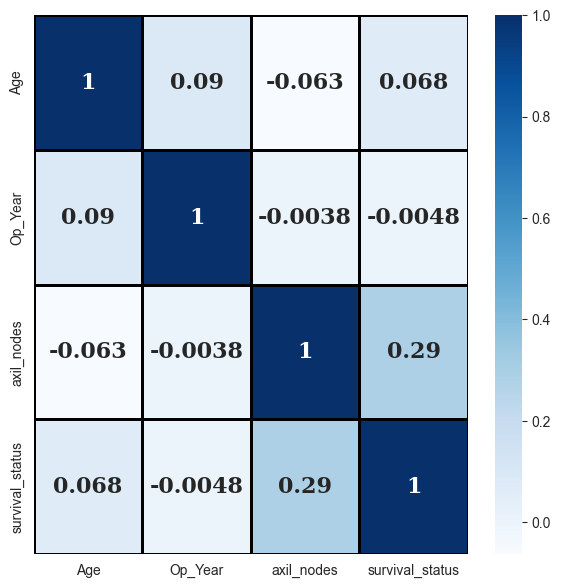

In [393]:
plt.figure(figsize=(7,7))
corr = corelated_haberman.corr()
sns.heatmap(
    corr,
    xticklabels = corr.columns,
    yticklabels = corr.columns,
    cmap='Blues',
    annot=True,
    annot_kws = {
        'fontsize' : 16,
        'fontweight' : 'bold',
        'fontfamily' : 'serif'
        },
    linewidth =1,
    linecolor ='black'
)

# Report

### Findings

Observations regarding the data:

    -Age, Operation year and Detected axil nodes is numerical data type
    -Survival status (the label-class) is a categorical (Binary) data type

Observations regarding summary statistics:

    -The age of donors is vary from 30 to 83 with the median of 52.
    -Maximum number of positive axil nodes observed is 52, nearly 75% of the donors have less than 5 positive axil nodes and nearly 25% of the donors have no positive axil nodes.
    -73% of total cases are lived.

Visualization findings:

    -It's more likely to survive if the patient has been treated after 1964, More likely not to survive before 1963.
    -From the pair-plot we can find a clear seperation between the number of positive axil nodes detected and the surviving status.
    -The number of positive axil nodes detected is not correlated with the Operational year, Which even means the scientific progress throughout the years wasn't sufficient to detect more positive axil nodes or the positive axil nodes was already easy to be detected.
    -The number of positive axil nodes is slightly correlated with survival status (Direct proportion)
    -The Age also is slightly correlated with survival status (Direct proportion)

final conclusion:-

    We can simply say that it's younger people are more likely to survive, people treated after 1964 have a higher chance to survive, people with less positive axillary nodes are more likely to survive.